In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def F_mot(norm, theta, phi) : 
    F = np.zeros(3)
    F[0] = norm*np.sin(theta)*np.cos(phi)
    F[1] = norm * np.sin(theta)*np.sin(phi)
    F[2] = norm * np.cos(theta)

    return F



def translation(Motors, law):
    Motors_cart = np.zeros((8,3))
    for i, motor in enumerate(Motors[:, :3]) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    return np.dot(law, Motors_cart)


def rotation(Motors, mass_center, geom_center, law) :
    Motors_cart = np.zeros((8,3))
    Motors_pos = Motors[:, 3:]
    Motors_dyn = Motors[:, :3]
    
    for i, motor in enumerate(Motors_dyn) :
        Motors_cart[i, :] = F_mot(motor[0], motor[1], motor[2])
    
    
    geom = geom_center - mass_center

    # torque = np.cross(geom, Motors_cart, 1, 1)

    torque_G = np.zeros((8,3))
    torque_O = np.zeros((8,3))
    for i, motor in enumerate(Motors):
        torque_O[i, :] = np.cross(Motors_pos[i, :] - geom_center, Motors_cart[i, :])
        torque_G[i, :] =  torque_O[i, :] + np.cross(geom, Motors_cart[i, :])
    return np.dot(law, torque_G)    

def printT(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Tx", "Ty", "Tz"])
    df = df.round(2)
    print(df)
 
def printR(movement_arr):
    dict_ = {}
    for i in range(movement_arr.shape[0]):
        dict_[f"Law {i}"] = movement_arr[i, :]
    df = pd.DataFrame.from_dict(dict_, orient='index', columns=["Rx", "Ry", "Rz"])
    df = df.round(2,)
    print(df)   

def printM(Motors, mass_center, geom_center, laws):
    print("For these laws the translations would be :")
    printT(translation(Motors, laws))
    print("\n")
    print("and the rotations :")
    printR(rotation(Motors, mass_center, geom_center, laws))
pi = np.pi

In [3]:
# Coordinate [x, y, z]
L, l, h = 5, 1.25, 1.25 # Dimesions in dm beacause of the scale of the graphs
geom_center = [0, 0, 0] # Origin of the referential
mass_center = [L, 0, 0] # Mass center of the robot
mass_center = np.array(mass_center)
geom_center = np.array(geom_center)


# Motor [power, theta, phi, x, y, z]
# theta is the polar angle and phi is the azimuthal one.
Motor_1 = [1, pi/4 , -pi/2, L, l, h]
Motor_2 = [1, pi/4, pi/2, L, l, -h]
Motor_3 = [1,  pi/4, pi/4, -L, l, h]
Motor_4 = [1, pi/4, 5*pi/4, -L, l, -h]
Motor_5 = [1,  pi/4, -pi/4, -L, -l, h]
Motor_6 = [1, pi/4 , -5*pi/4, -L, -l, -h]
Motor_7 = [1, pi/4, pi/2, L, -l, h]
Motor_8 = [1, pi/4, -pi/2, L, -l, -h]

Motors = np.array([Motor_1,Motor_2, Motor_3, Motor_4, Motor_5, Motor_6, Motor_7, Motor_8]) 

print(Motors)

[[ 1.          0.78539816 -1.57079633  5.          1.25        1.25      ]
 [ 1.          0.78539816  1.57079633  5.          1.25       -1.25      ]
 [ 1.          0.78539816  0.78539816 -5.          1.25        1.25      ]
 [ 1.          0.78539816  3.92699082 -5.          1.25       -1.25      ]
 [ 1.          0.78539816 -0.78539816 -5.         -1.25        1.25      ]
 [ 1.          0.78539816 -3.92699082 -5.         -1.25       -1.25      ]
 [ 1.          0.78539816  1.57079633  5.         -1.25        1.25      ]
 [ 1.          0.78539816 -1.57079633  5.         -1.25       -1.25      ]]


In [4]:
# law = [% of motor 1 activation, % of motor 2 activation, ....] len has to be the same as Motors
lois_translation = np.array([
    [ 0,  0, 1, -1, 1, -1, 0, 0], #Tx parfait !
    [ 1,  -1,  0,  0, 0, 0, -1, 1] , #Ty [ -1,  1,  1,  -1, -1, 1, -1, 1] rotation résiduelle avec cette loi-ci clairement
    [ 1,  1,  0,  0, 0, 0, 1, 1] #Tz, pas de translation, mais pas rapide  , [ 1,  1,  1,  1, 1, 1, 1, 1] translation résiduelle pour cette commande pure
]) #-  np.array([
#     [0, 0, 0, 0, 0, 0, 0, 0],     #pas de rotations residuelles
#     [0, 0, 0, 0, 0, 0, 0, 0], #Rz ne marche pas car translation rédisuelles trop fortes
#     [ -1,  -1,  1,  1,  1,  1, -1, -1]    #Ry
# ])
printM(Motors, mass_center, geom_center, lois_translation)
print("\n")
print("lois de translation:")    
print(lois_translation.T)

# on ne devrait pas avoir de moment en x si? 

For these laws the translations would be :
        Tx    Ty    Tz
Law 0  2.0  0.00  0.00
Law 1  0.0 -2.83  0.00
Law 2  0.0  0.00  2.83


and the rotations :
        Rx   Ry   Rz
Law 0  0.0  0.0  0.0
Law 1  0.0  0.0  0.0
Law 2  0.0  0.0  0.0


lois de translation:
[[ 0  1  1]
 [ 0 -1  1]
 [ 1  0  0]
 [-1  0  0]
 [ 1  0  0]
 [-1  0  0]
 [ 0 -1  1]
 [ 0  1  1]]


In [5]:
lois_rotation = np.array([
    [1,  1,  0, 0,  0,  0, -1,  -1],     #Rx [-0.816,  -0.816,  -1, 1,  1,  -1, -0.816,  -0.816] bah oui logique, il faut pas une face carrée sinon on va pas faire de rotation
    [ 0.816,  0.816,  -1,  -1,  -1,  -1, 0.816,  0.816], #Ry il y a une petite translation selon z tout de même... Pire avec que les moteurs arrières :[ 0,  0,  -1,  -1,  -1,  -1, 0,  0]
    [ 0,  0,  1, -1,  -1,  1, 0, 0]    #Rz petite translations selon y...[ 1,  1,  -1, 1,  1,  -1, 1, 1] , les autres moteurs n'ay changent rien on dirait...
    ]) - np.array([       #ici on corrige avec des translations pures qui viennent de l'autre matrice...
                    [0, 0, 0, 0, 0, 0, 0, 0], 
                    [ -0.52/2.83,  -0.52/2.83,  0,  0, 0, 0, -0.52/2.83, -0.52/2.83] , # valeur de la translation à ôter *Tz/ valeur de la translation par la loi
                    [0, 0, 0, 0, 0, 0, 0, 0]
                  ]) + np.array([
                                    [0, 0, 0, 0, 0, 0, 0, 0], 
                                    [0, 0, 0, 0, 0, 0, 0, 0], 
                                    [ 2/2.83,  -2/2.83,  0,  0, 0, 0, -2/2.83, 2/2.83] # valeur de la translation à ôter *Ty/ valeur de la translation par la loi
                               ])

print("lois_rotation")
print(lois_rotation.T)
printM(Motors, mass_center, geom_center, lois_rotation)

lois_rotation
[[ 1.          0.99974558  0.70671378]
 [ 1.          0.99974558 -0.70671378]
 [ 0.         -1.          1.        ]
 [ 0.         -1.         -1.        ]
 [ 0.         -1.         -1.        ]
 [ 0.         -1.          1.        ]
 [-1.          0.99974558 -0.70671378]
 [-1.          0.99974558  0.70671378]]
For these laws the translations would be :
        Tx   Ty   Tz
Law 0  0.0  0.0  0.0
Law 1  0.0  0.0 -0.0
Law 2  0.0  0.0  0.0


and the rotations :
         Rx     Ry    Rz
Law 0  7.07   0.00   0.0
Law 1  0.00 -30.78   0.0
Law 2  0.00   0.00 -22.5


Legend :
Motors :
Green : Positif (in the same sense as the vector)
Orange : Negatif (in the opposite sense as the vector)
Red : Null

Black vector : Translation resultant
Purple vector : Rotation resultant


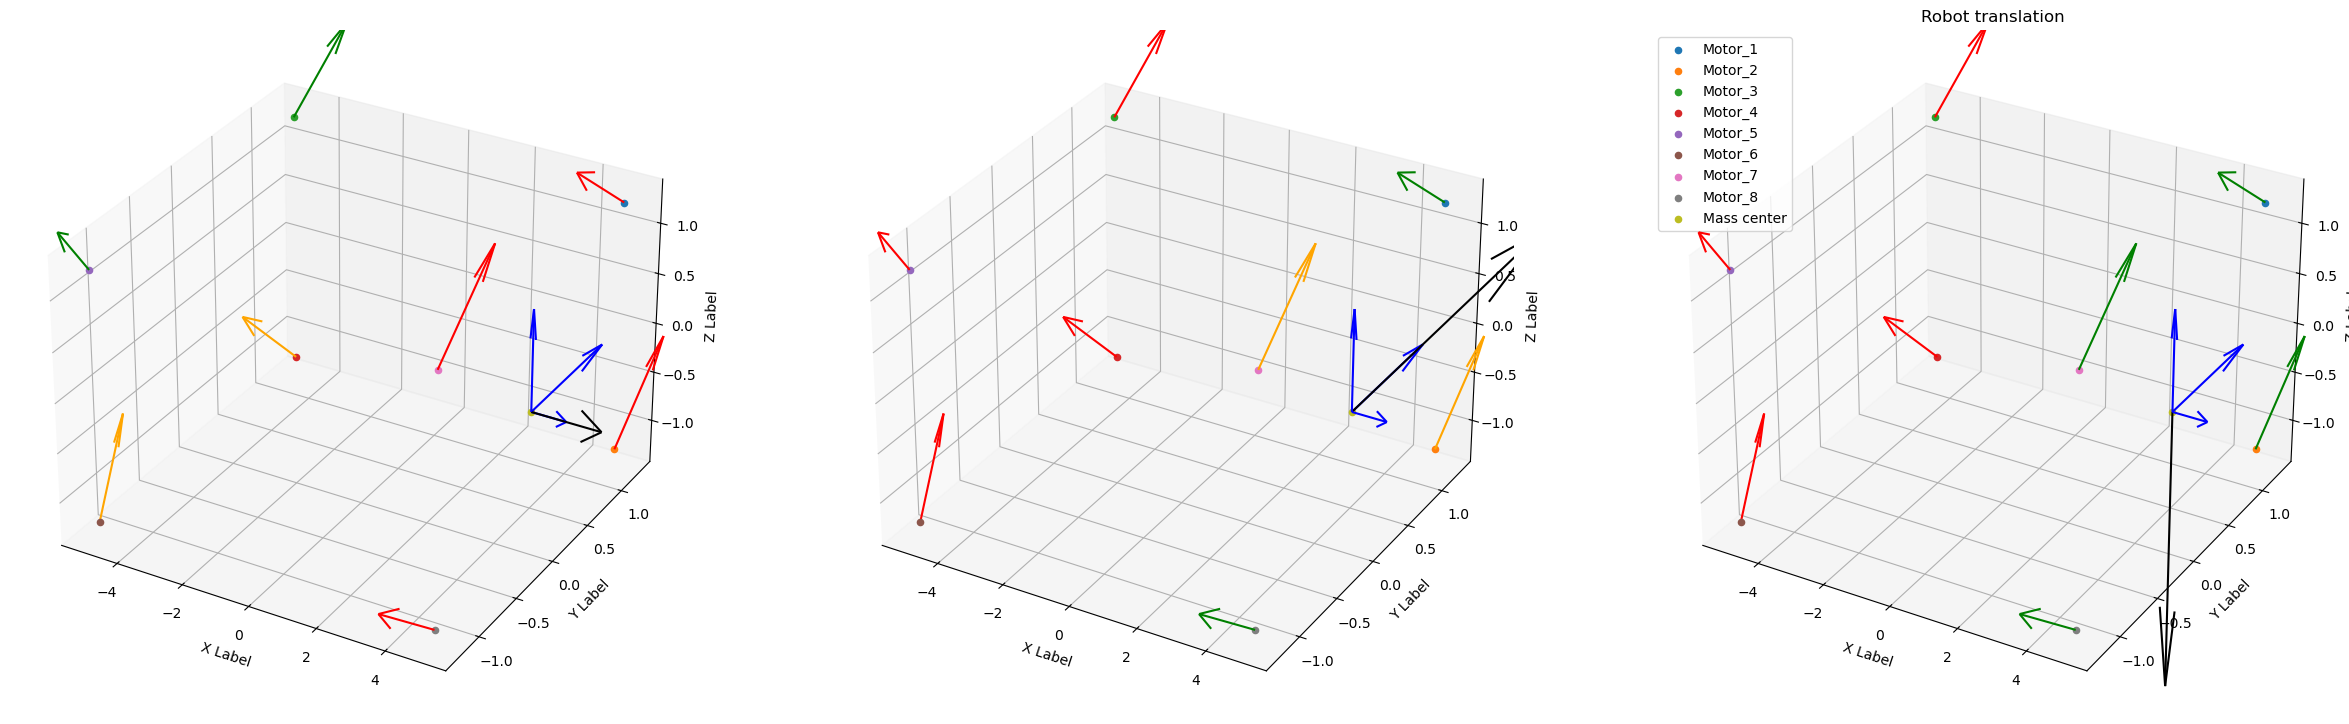

Saved in robot_trans.pdf


In [24]:
print("Legend :")
print("Motors :")
print("Green : Positif (in the same sense as the vector)")
print("Orange : Negatif (in the opposite sense as the vector)")
print("Red : Null")
print()
print("Black vector : Translation resultant")
print("Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_translation)
resltR = rotation(Motors, mass_center, geom_center, lois_translation)
for k in range(len(lois_translation)):
    ax = fig.add_subplot(1,len(lois_translation),k+1,projection = '3d')
    ax.set_aspect('auto')
    # ax.set_xlim(, 5)
    # ax.set_ylim(-5, 5)
    # ax.set_zlim(-10, 10)

    for i, motor in enumerate(Motors):
        
        if lois_translation[k][i] == 1:
            color = 'green'
        elif lois_translation[k][i] == -1:
            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[i+4][3]], [Motors[i][4], Motors[i+4][4]], [Motors[i][5], Motors[i+4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i][3], Motors[(i+1)%4][3]], [Motors[i][4], Motors[(i+1)%4][4]], [Motors[i][5], Motors[(i+1)%4][5]], color = 'black')
#
#    for i in range(4):
#        ax.plot([Motors[i+4][3], Motors[(i+1)%4+4][3]], [Motors[i+4][4], Motors[(i+1)%4+4][4]], [Motors[i+4][5], Motors[(i+1)%4+4][5]], color = 'black')       



    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')



    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Robot translation")
plt.savefig("robot_trans.pdf")
plt.show()
print("Saved in robot_trans.pdf")

Legend :
Motors :
Green : Positif (in the same sense as the vector)
Orange : Negatif (in the opposite sense as the vector)
Red : Null

Black vector : Translation resultant
Purple vector : Rotation resultant


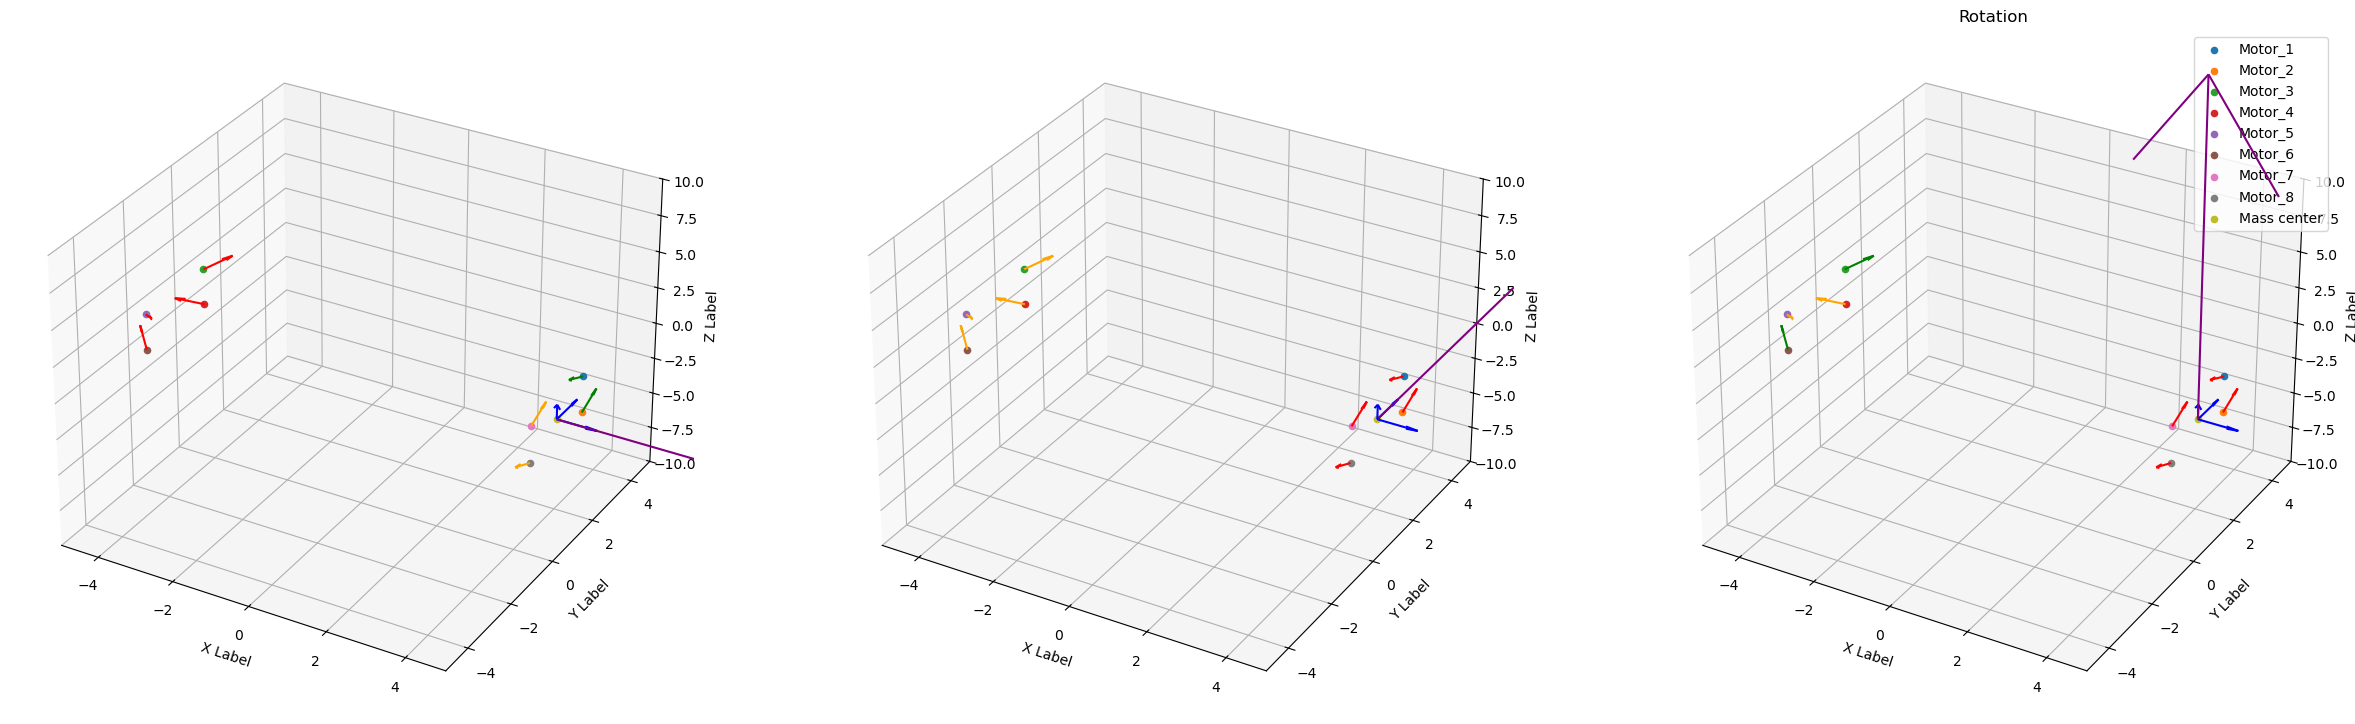

Saved in robot_rot.pdf


In [25]:
print("Legend :")
print("Motors :")
print("Green : Positif (in the same sense as the vector)")
print("Orange : Negatif (in the opposite sense as the vector)")
print("Red : Null")
print()
print("Black vector : Translation resultant")
print("Purple vector : Rotation resultant")

fig = plt.figure(figsize = (30, 30))
reslt = translation(Motors, lois_rotation)
resltR = rotation(Motors, mass_center, geom_center, lois_rotation)
for k in range(len(lois_rotation)):
    ax = fig.add_subplot(1,len(lois_rotation),k+1,projection = '3d')
    ax.set_aspect('auto')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-10, 10)

    for i, motor in enumerate(Motors):
        if lois_rotation[k][i] == 1:
            color = 'green'
        elif lois_rotation[k][i] == -1:

            color = 'orange'
        else:
            color = 'red'

        ax.scatter(motor[3], motor[4], motor[5], label = f'Motor_{i+1}')
        x,y,z = F_mot(motor[0], motor[1], motor[2])
        ax.quiver(motor[3], motor[4], motor[5], x, y, z, color = color)

    ax.scatter(mass_center[0], mass_center[1], mass_center[2], label = "Mass center")
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 0, 1, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 0, 1, 0, color = 'blue')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], 1, 0, 0, color = 'blue')


    T = reslt[k, :]
    R = resltR[k, :]
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], T[0], T[1], T[2], color='black')
    ax.quiver(mass_center[0], mass_center[1], mass_center[2], R[0], R[1], R[2], color='purple')


    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
plt.legend()
plt.title("Rotation")
plt.savefig("robot_rot.pdf")
plt.show()
print("Saved in robot_rot.pdf")